#Campaña de Marketing para la adquisicion de depositos de clientes



##Introduccion

El caso que nos compete involucra a un banco que ha decidido ampliar su base de clientes y ofrecer productos financieros específicos, como los depósitos a plazo fijo. Para alcanzar este objetivo, ha optado por colaborar con una empresa de marketing especializada en la identificación y atracción de potenciales clientes.

El propósito principal un contacto efectivo con individuos que puedan estar interesados en adquirir un depósito a plazo fijo en el banco. Para lograrlo, es **esencial comprender el perfil de nuestro cliente principal**, lo que nos permitirá dirigir nuestros esfuerzos de manera más precisa y eficiente.

##Objetivo

El objetivo es desarrollar un modelo predictivo que pueda identificar patrones y tendencias en el comportamiento de los clientes bancarios con respecto a la adhesión a depósitos, empleando técnicas de clasificación. Esto permitirá al banco anticipar las necesidades y preferencias de los clientes, optimizando así sus estrategias de marketing y fidelización.

###Dataset

ACERCA: El conjunto de datos "marketing dirigido a bancos" es una colección de datos centrada en la campaña de marketing de un banco para captar depósitos de clientes. Este conjunto de datos contiene varios atributos relacionados con la demografía de los clientes como de sus
interacciones previas con el banco

#### Cargo las librerias

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

####Cargo los datos

In [60]:
df = pd.read_csv('/content/BankMarketingDataset.csv')

Veamos algunas caracteristicas del Dataset

In [61]:
print(df.shape) #Indica el numero de (filas, columnas)
df.head() #Nos muestra las primeras 5 filas del dataset


(56373, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [62]:
#Veamos que tipo de variables tenemos, si de tipo categorica o numerica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        56373 non-null  int64 
 1   job        56373 non-null  object
 2   marital    56373 non-null  object
 3   education  56373 non-null  object
 4   default    56373 non-null  object
 5   balance    56373 non-null  int64 
 6   housing    56373 non-null  object
 7   loan       56373 non-null  object
 8   contact    56373 non-null  object
 9   day        56373 non-null  int64 
 10  month      56373 non-null  object
 11  duration   56373 non-null  int64 
 12  campaign   56373 non-null  int64 
 13  pdays      56373 non-null  int64 
 14  previous   56373 non-null  int64 
 15  poutcome   56373 non-null  object
 16  deposit    56373 non-null  object
dtypes: int64(7), object(10)
memory usage: 7.3+ MB


Tenemos un total de 17 variables, donde 7 son del tipo numericas y 10 del tipo categorica

####Descripcion de variables

Sintesis de los datos de las columnas

1. "age": Edad (numérico)
2. "job": Tipo de trabajo (categórico: "administrativo", "desconocido","desempleado", "gerencia", "ama de casa", "emprendedor", "estudiante", "blue-collar", "autónomo", "jubilado", "técnico", "servicios")
3. "marital": Estado civil (categórico: "casado", "divorciado", "soltero")
4. "education": Nivel educativo (categórico: "desconocido", "secundaria", "primaria", "terciaria")
5. "default": Si dejó de pagar sus obligaciones (categórico: "sí", "no")
6. "balance": Saldo anual en euros (numérico)
7. "housing": ¿Tiene crédito hipotecario? (categórico: "sí", "no")
8. "loan": ¿Tiene préstamos al consumo? (categórico: "sí", "no")
9. "contact": Medio por el cual fue contactada la persona (categórico: "desconocido", "teléfono", "celular")
10. "day": Último día en que se contactó a la persona (numérico)
11. "month": Último mes en que se contactó a la persona (categórico: "ene", "feb", "mar", ..., "nov", "dic")
12. "duration": Duración (en segundos) del último contacto (numérico)
13. "campaign": Número total de veces que la persona fue contactada durante la campaña (numérico)
14. "pdays": Número de días transcurridos después de que la persona fue contactada antes de la campaña actual (numérico, -1 indica que no fue contactada previamente)
15. "previous": Número de veces que la persona fue contactada antes de esta campaña (numérico)
16. "poutcome": Resultado de la última campaña de marketing (categórico: "desconocido", "otro", "fracaso", "éxito")
17. "deposit": ¿Se suscribió el cliente al producto (depósito fijo)? (categórico: "sí", "no")



###Analisis de nulos

De todas las variables que vimos con la anterior funcion debemos comprobar que tengan una cantidad de datos adecuada, es decir que no tenga tantos valores nulos

* La siguiente funcion filtra los valores nulos y muestra la cantidad en cada variable, mostrandolo en orden descendiente   

In [63]:
df.isna().sum().sort_values(ascending = False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
deposit      0
dtype: int64

Es decir, no tenemos valores nulos

###Visualizacion de datos

#### 1. Analicemos el salario percibido por cada sector de trabajo





<Figure size 1500x600 with 0 Axes>

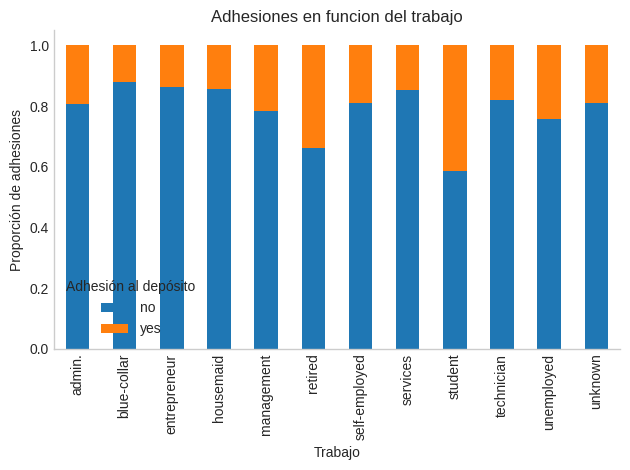

In [64]:
tabla0 = pd.crosstab(df.job, df.deposit)
tabla0 = tabla0.div(tabla0.sum(1).astype(float), axis=0)

# Plotting
plt.figure(figsize=(15, 6))

# Graficar barras apiladas
tabla0.plot(kind='bar', stacked=True)

plt.title('Adhesiones en funcion del trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Proporción de adhesiones')
plt.legend(title='Adhesión al depósito', loc="best")
plt.grid()

# Eliminar bordes superior y derecho del gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

* **Trabajo**: Notemos que el tipo de trabajo de los clientes tiene un fuerte impacto en la adhesion o la no adhesion al deposito

####2. Analicemos la distribucion de niveles de educacion

<Figure size 1500x600 with 0 Axes>

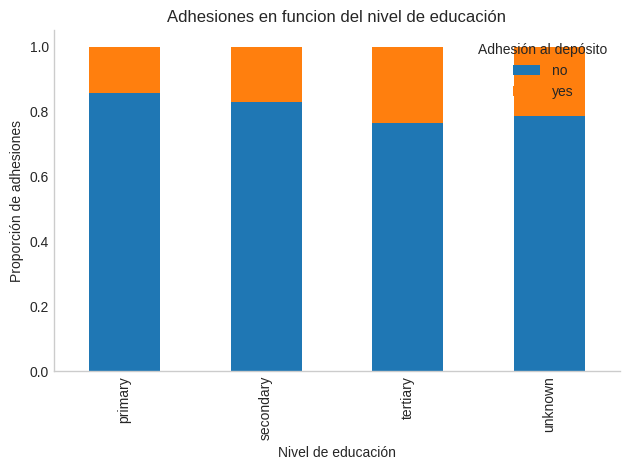

In [65]:
tabla1 = pd.crosstab(df.education, df.deposit)
tabla1 = tabla1.div(tabla1.sum(1).astype(float), axis=0)

# Plotting
plt.figure(figsize=(15, 6))

# Graficar barras apiladas
tabla1.plot(kind='bar', stacked=True)

plt.title('Adhesiones en funcion del nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Proporción de adhesiones')
plt.legend(title='Adhesión al depósito', loc="best")
plt.grid()

# Eliminar bordes superior y derecho del gráfico
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

* **Educacion**: El nivel de educacion puede llegar a ser una variable predictora

####3. Analicemos en que momento del año se producen las adhesiones

<Figure size 1500x600 with 0 Axes>

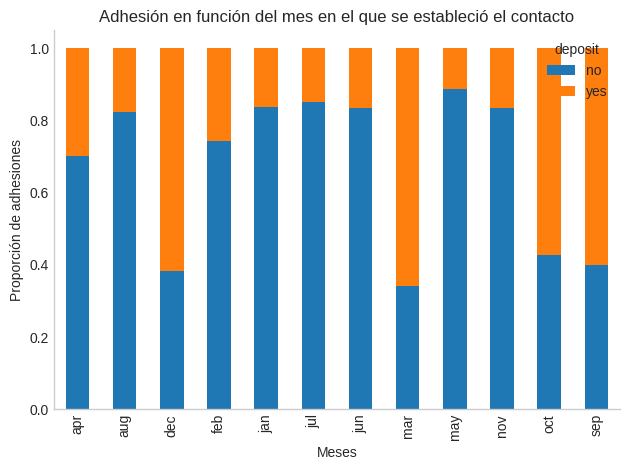

In [66]:
table2 = pd.crosstab(df.month, df.deposit)
table2 = table2.div(table2.sum(1).astype(float), axis=0)
plt.figure(figsize=(15, 6))
table2.plot(kind='bar', stacked=True)

plt.title('Adhesión en función del mes en el que se estableció el contacto')
plt.xlabel('Meses')
plt.ylabel('Proporción de adhesiones')
plt.grid()
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

* **Mes de contacto**: El mes de contacto repercute en la adhesion al deposito

####4. Analicemos la adhesion por edad y por balance

Los siguientes graficos buscan determinar si existe una relacion entre la adhesion al deposito, la edad y el balance

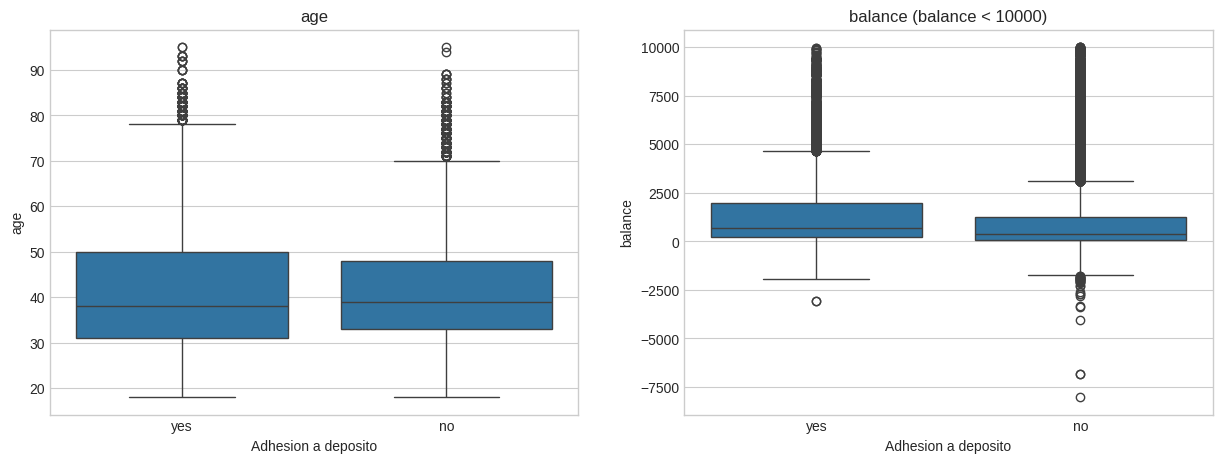

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.25)

sns.boxplot(x='deposit', y='age', data=df, ax=ax[0])
ax[0].set_xlabel('Adhesion a deposito')
ax[0].set_title('age')

filtered_df = df[df['balance'] < 10000]
sns.boxplot(x='deposit', y='balance', data=filtered_df, ax=ax[1])
ax[1].set_xlabel('Adhesion a deposito')
ax[1].set_title('balance (balance < 10000)')

plt.show()

 * **Edad y balance**: No hay una diferencia significativa en la media de la edad y la del balance y la adhesión al deposito, es probable que la edad no tenga mucho peso es dicha variable.

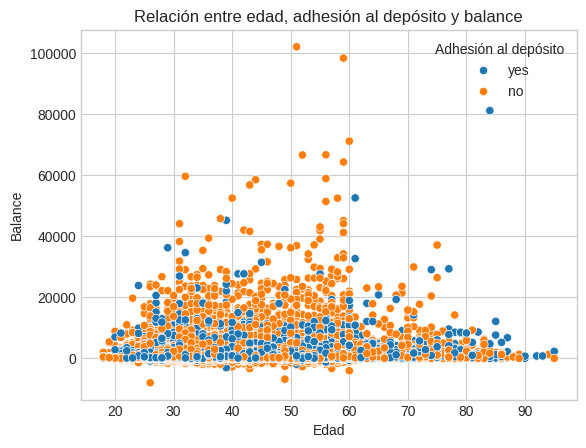

In [68]:
sns.scatterplot(x='age', y='balance', hue='deposit', data=df)

# Títulos y etiquetas
plt.title('Relación entre edad, adhesión al depósito y balance')
plt.xlabel('Edad')
plt.ylabel('Balance')
plt.legend(title='Adhesión al depósito')

# Mostrar el gráfico
plt.show()

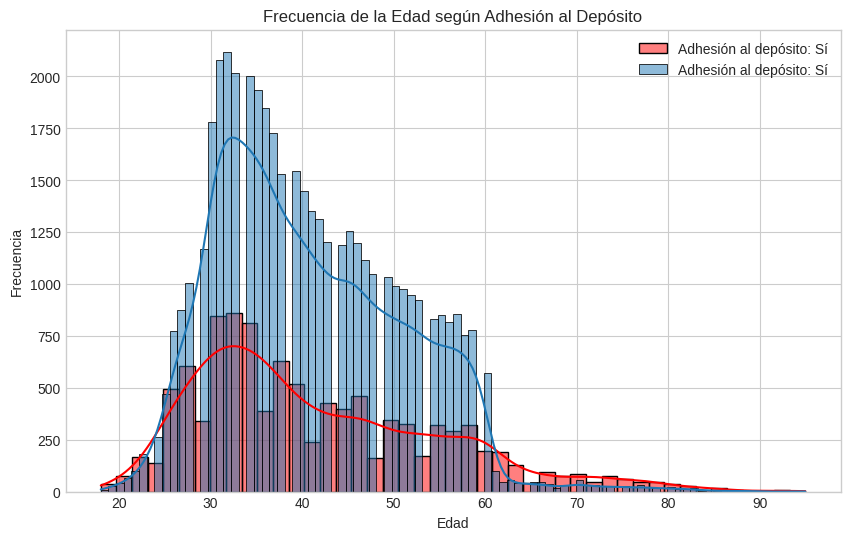

In [69]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(df[df['deposit'] == 'yes']['age'], color='red', label='Adhesión al depósito: Sí', kde=True)
sns.histplot(df[df['deposit'] == 'no']['age'], label='Adhesión al depósito: Sí', kde=True)

# Títulos y etiquetas
plt.title('Frecuencia de la Edad según Adhesión al Depósito')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

Vemos que ambos graficos de frecuencia se comportan igual, sin embargo, si bien la mayor frecuencia de adhesiones es en un rango de los 30 a los 40 años, nos encontramos en proporcion las adhesiones son mayores para los clientes de mas de 60 años

Por ultimo, una vista general de como estan distribuidos los datos en el Data Frame

<ipython-input-70-106fcbd1b404>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


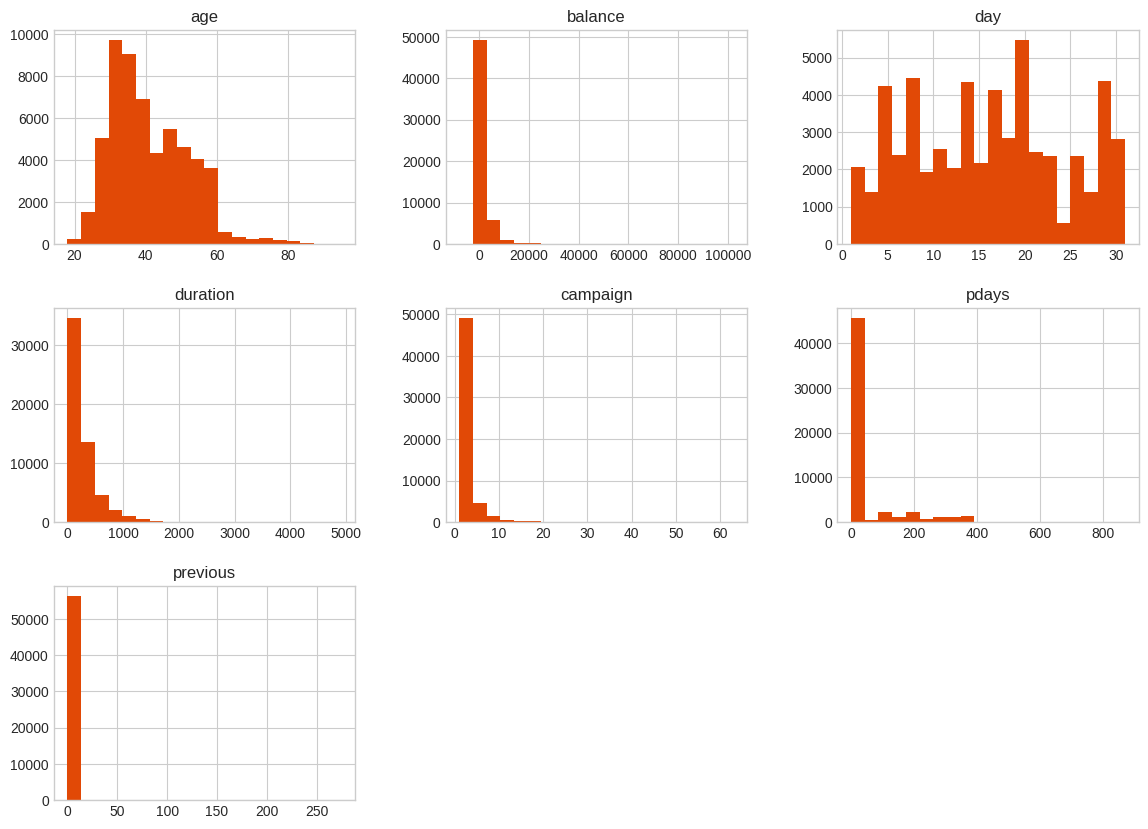

In [70]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [71]:
df['deposit'].value_counts()

deposit
no     45795
yes    10578
Name: count, dtype: int64

###Feature Selection

Hemos entendido el contexto en el que nos encontramos a partir del Analisis Exploratorio de Datos (EDA) y la visualizacion de los datos. A partir de estos primeros insights debemos determinar cuales son las variables mas importantes para utilizar en la implementacion del modelo de Machine Learning.

####Dependencia Variables numericas vs Variables numericas

Para comenzar con el analisis de variables numericas, separaremos el Df para quedarnos unicamente con las variables numericas.

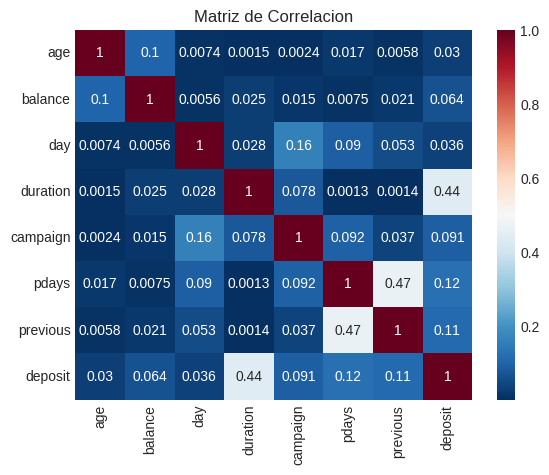

In [72]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#Convierto a la variable target en un valor numerico (1:'Yes' 0:'No')
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])


#Separo el Df
Dfnumerico = df.select_dtypes(exclude='object')
Dfcategorico = df.select_dtypes(include='object')

#Realizo la matriz de correlacion
dfnum_corr = Dfnumerico.corr()
dfnum_corr = abs(dfnum_corr)


sns.heatmap(dfnum_corr, cbar=True,annot = True, cmap="RdBu_r")
plt.title('Matriz de Correlacion')
plt.show()


No se encuentra una correlacion muy fuerte entre ninguna variable numerica.

In [73]:
from scipy.stats import pearsonr
import numpy as np
rho = Dfnumerico.corr()
pval = Dfnumerico.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
rho


,age,balance,day,duration,campaign,pdays,previous,deposit
age,1.000000,0.101250,-0.007360,-0.001533,0.002417,-0.017132,0.005828,0.029809
balance,0.101250,1.000000,0.005596,0.024846,-0.015123,0.007454,0.020500,0.063791
day,-0.007360,0.005596,1.000000,-0.027839,0.157817,-0.089853,-0.053414,-0.035650
duration,-0.001533,0.024846,-0.027839,1.000000,-0.078064,-0.001250,0.001425,0.438473
campaign,0.002417,-0.015123,0.157817,-0.078064,1.000000,-0.092324,-0.037217,-0.090795
pdays,-0.017132,0.007454,-0.089853,-0.001250,-0.092324,1.000000,0.466584,0.123938
previous,0.005828,0.020500,-0.053414,0.001425,-0.037217,0.466584,1.000000,0.112694
deposit,0.029809,0.063791,-0.035650,0.438473,-0.090795,0.123938,0.112694,1.000000


En general, se pueden considerar los siguientes rangos como referencia para interpretar el coeficiente de correlación de Pearson:

* ρ cerca de 1 o -1: Indica una correlación lineal fuerte.

* ρ entre 0.5 y 0.7 (o -0.5 y -0.7): Indica una correlación lineal moderada.

* ρ entre 0.3 y 0.5 (o -0.3 y -0.5): Indica una correlación lineal débil.

* ρ cercano a 0: Indica una correlación lineal muy débil o ninguna correlación.

Vemos que las correlacion lineal entre variables numericas son muy debiles. Por lo tanto buscaremos la correlacion a partir del coeficiente de Spearman

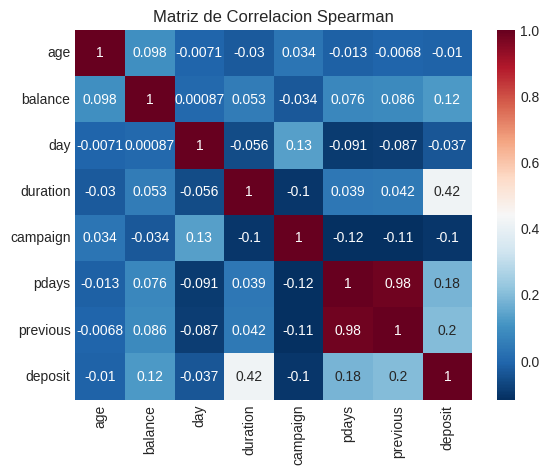

In [74]:
from scipy.stats import spearmanr
corr_matriz = Dfnumerico.corr(method='spearman')
sns.heatmap(corr_matriz, cbar=True,annot = True, cmap="RdBu_r")
plt.title('Matriz de Correlacion Spearman')
plt.show()


Notemos que entre las variables "Previous" y "Pdays" hay una correlación positiva fuerte, un valor de 0.98 sugiere que hay una relación muy estrecha entre las dos variables, y que tienden a moverse juntas en la misma dirección.
Notemos tambien una correlacion media entre nuestra variable target "Deposit" y la variable "Duration"

La alta correlacion (casi perfecta) nos permite quedarnos con una de ambas, seleccionaremos la variable "Previous" debido a que tiene un poco mas de correlacion con la variable Target, por lo tanto se eliminara la variable "Pdays"

####Dependencia Variables Categoricas vs Variables Categoricas.

Se procede a realizar un anailisis de las variables categoricas a partir de la estadistica descriptiva.


In [75]:
Dfcategorico.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

A partir de estas columnas buscaremos interpretar su dependencia o independencia entre ellas a partir del test de hipotesis

##### Comparo las variables "Job" y "education"

La Hipotesis nula establece que no hay relación entre las dos variables categóricas

In [76]:
from scipy.stats import chi2_contingency

t = pd.crosstab(Dfcategorico.job, Dfcategorico.education)
chi2, p_value, dof, expected = chi2_contingency(t)

# Imprimir los resultados
print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Realizar el test de hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula de independencia entre las variables categóricas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de independencia entre las variables categóricas.")

Estadístico chi-cuadrado: 35662.67009882975
Valor p: 0.0
Grados de libertad: 33
Frecuencias esperadas:
[[ 963.63959697 3309.21522715 1960.5121246   271.63305128]
 [1729.66271087 5939.79969134 3518.97610558  487.5614922 ]
 [ 268.87100208  923.32446384  547.01452823   75.79000585]
 [ 224.28137584  770.20013127  456.29751832   63.22097458]
 [1781.21483689 6116.83380342 3623.85823     502.09312969]
 [ 450.63668778 1547.52232452  916.81443244  127.02655527]
 [ 293.90637362 1009.29792631  597.94866337   82.8470367 ]
 [ 752.09811435 2582.76490519 1530.13375197  212.0032285 ]
 [ 192.28350451  660.31688929  391.19826867   54.20133752]
 [1395.46272152 4792.13027513 2839.05060933  393.35639402]
 [ 245.90956664  844.47306335  500.29978891   69.31758111]
 [  53.03350895  182.1212992   107.89597857   14.94921328]]
Se rechaza la hipótesis nula de independencia entre las variables categóricas.


##### Comparo las variable "Loan" y "Housing"

La Hipotesis nula establece que no hay relación entre las dos variables categóricas

In [77]:
t = pd.crosstab(Dfcategorico.loan, Dfcategorico.housing)
chi2, p_value, dof, expected = chi2_contingency(t)

# Imprimir los resultados
print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Realizar el test de hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula de independencia entre las variables categóricas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de independencia entre las variables categóricas.")

Estadístico chi-cuadrado: 140.04060015254416
Valor p: 2.6081672497154204e-32
Grados de libertad: 1
Frecuencias esperadas:
[[21953.46314725 25715.53685275]
 [ 4008.53685275  4695.46314725]]
Se rechaza la hipótesis nula de independencia entre las variables categóricas.


##### Comparo las variable "Contact" y "Month"

La hipotesis nula establece que no hay relacion entre las dos variables categoricas

In [78]:
t = pd.crosstab(Dfcategorico.contact, Dfcategorico.month)
chi2, p_value, dof, expected = chi2_contingency(t)

# Imprimir los resultados
print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Realizar el test de hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula de independencia entre las variables categóricas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de independencia entre las variables categóricas.")

Estadístico chi-cuadrado: 28516.400710380487
Valor p: 0.0
Grados de libertad: 22
Frecuencias esperadas:
[[ 2552.56213081  5142.20428219   214.53440477  2267.84054423
   1156.76421336  5567.96237561  4345.64598301   498.59384812
  10984.956096    3253.10966243   748.22184379   594.60461568]
 [  251.65238678   506.96042432    21.1505508    223.58221134
    114.04324765   548.93512852   428.42921257    49.15544676
   1082.98653611   320.71807426    73.76580987    58.62097103]
 [ 1050.78548241  2116.83529349    88.31504444   933.57724443
    476.19253898  2292.10249588  1788.92480443   205.25070512
   4522.05736789  1339.17226332   308.01234634   244.77441328]]
Se rechaza la hipótesis nula de independencia entre las variables categóricas.


##### Comparo las variable "Loan" y "Default"

La hipotesis nula establece que no hay relacion entre las dos variables categoricas

In [79]:
t = pd.crosstab(Dfcategorico.default, Dfcategorico.loan)
chi2, p_value, dof, expected = chi2_contingency(t)

# Imprimir los resultados
print("Estadístico chi-cuadrado:", chi2)
print("Valor p:", p_value)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:")
print(expected)

# Realizar el test de hipótesis
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula de independencia entre las variables categóricas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de independencia entre las variables categóricas.")

Estadístico chi-cuadrado: 335.61880350018157
Valor p: 5.741630187781398e-75
Grados de libertad: 1
Frecuencias esperadas:
[[46837.77535345  8552.22464655]
 [  831.22464655   151.77535345]]
Se rechaza la hipótesis nula de independencia entre las variables categóricas.


####Estandarizacion de Variables


Defino un nuevo dataframe numerico, en el cual se ha quitado la variable "pdays" debido a su alta correlacion con la variable "previous". Estandarizamos las variables numericas  ya que ayuda a mejorar la estabilidad numérica, la convergencia del modelo y la interpretación de los resultados.

In [80]:
from sklearn.preprocessing import StandardScaler

A = Dfnumerico[['age', "balance", "day", "duration",  "campaign", "previous"]]

scaler = StandardScaler()
A = scaler.fit_transform(A)
A = pd.DataFrame(A, columns=['age', "balance", "day", "duration",  "campaign", "previous"])
A

,age,balance,day,duration,campaign,previous
0,1.653714,0.307527,-1.291888,2.706828,-0.565630,-0.273632
1,1.378175,-0.438086,-1.291888,4.217933,-0.565630,-0.273632
2,0.000481,-0.040620,-1.291888,3.940601,-0.565630,-0.273632
3,1.286329,0.350680,-1.291888,1.060612,-0.565630,-0.273632
4,1.194482,-0.392985,-1.291888,1.394833,-0.235483,-0.273632
...,...,...,...,...,...,...
56368,0.918943,-0.185006,0.146601,2.475717,0.094664,-0.273632
56369,2.755869,0.108307,0.146601,0.623280,-0.235483,-0.273632
56370,2.847715,1.401610,0.146601,3.009049,0.754958,1.028827
56371,1.470021,-0.235946,0.146601,0.808168,0.424811,-0.273632


Para poder aplicar los modelos de Machine Learning, transformamos las variables categóricas aplicando la codificación One Hot Encoding.

In [81]:
B = pd.get_dummies(Dfcategorico, drop_first=True)
B = B.astype(int) #Vuelve el valor booleano True en 1 y el valor booleano False en 0
B

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56368,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
56369,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
56371,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


####Determinacion de Outliers

Durante la visualizacion grafica de datos vimos que habia muchos valores que se desvian del resto de las observaciones, estos valores atipicos pueden confundir a la hora de entrenar al modelo, por lo que debemos eliminarlos

In [82]:
# Calculamos los límites superior e inferior para cada variable numérica
Q1 = A.quantile(0.25)
Q3 = A.quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para considerar un valor como outlier
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filtramos los datos eliminando los outliers
A_filtered = A[~((A < lower_bound) | (A > upper_bound)).any(axis=1)]

# Eliminamos las filas que se consideraron outliers en A
B_filtered = B.loc[A_filtered.index]

# Concatenamos los dataframes A_filtered y B
X_filtered = pd.concat([A_filtered, B_filtered], axis=1)


# Mostramos el dataframe resultante
X_filtered

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3,1.286329,0.350680,-1.291888,1.060612,-0.565630,-0.273632,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.194482,-0.392985,-1.291888,1.394833,-0.235483,-0.273632,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0.092327,-0.452686,-1.291888,1.000167,-0.235483,-0.273632,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8,-0.366904,-0.452362,-1.172014,1.163722,-0.565630,-0.273632,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
16,-0.826136,-0.254440,-0.932266,0.925501,0.094664,-0.273632,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56364,-0.642443,-0.271961,0.146601,-0.201606,-0.565630,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56365,-1.652752,-0.416022,0.146601,-0.052273,-0.565630,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56367,-1.469060,-0.288833,0.146601,0.374392,-0.235483,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56369,2.755869,0.108307,0.146601,0.623280,-0.235483,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


Vemos que se han eliminado 22931 Filas que contenian algun valor atipico en alguna de las variables

In [83]:
y = Dfnumerico['deposit']
y=y.loc[X_filtered.index]
y


3        1
4        1
5        1
8        1
16       1
        ..
56364    1
56365    1
56367    1
56369    1
56371    0
Name: deposit, Length: 33442, dtype: int64

###Construccion de Modelos

Para la prediccion de la adhesion al banco llevaromos a testeo a tres modelos, nos quedaremos con el que presente un mayor rendimiento.
Los modelos seleccionados son los siguientes:
      
* Regresion Logistica
* RandomForest  
* XGBoost

Los tres modelos seran entrenados con un 80% de los datos y testeado con el 20% restante





In [84]:
X = X_filtered
X

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3,1.286329,0.350680,-1.291888,1.060612,-0.565630,-0.273632,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1.194482,-0.392985,-1.291888,1.394833,-0.235483,-0.273632,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,0.092327,-0.452686,-1.291888,1.000167,-0.235483,-0.273632,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8,-0.366904,-0.452362,-1.172014,1.163722,-0.565630,-0.273632,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
16,-0.826136,-0.254440,-0.932266,0.925501,0.094664,-0.273632,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56364,-0.642443,-0.271961,0.146601,-0.201606,-0.565630,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56365,-1.652752,-0.416022,0.146601,-0.052273,-0.565630,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56367,-1.469060,-0.288833,0.146601,0.374392,-0.235483,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
56369,2.755869,0.108307,0.146601,0.623280,-0.235483,-0.273632,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [85]:
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

####Regresion Logistica

Dividimos los datos como primer paso, definiendo el conjunto de entrenamiento

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Veamos como quedaron divididos los conjuntos
X_train.shape, X_test.shape


((26753, 41), (6689, 41))

Definimos el modelo y despues lo entrenamos con el conjunto de entrenamiento

In [87]:
ModeloRL = LogisticRegression()

#Entreno el modelo en los datos de entrenamiento
ModeloRL.fit(X_train,y_train)

LogisticRegression()

Procedemos a predecir los valores del conjunto de prueba

In [88]:
y_predRL = ModeloRL.predict(X_test)

Ya se realizaron las predicciones en los datos de prueba. Ahora debemos evaluar la precision del modelo utilizando la metrica de precision ('accuracy_score')

In [89]:
accuracyRL = accuracy_score(y_test, y_predRL)
print('Precision del modelo: ', accuracyRL)

Precision del modelo:  0.9125429810136044


####RandomForest

Realizamos el mismo procedimiento que con el modelo de regresion logistica.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Veamos como quedaron divididos los conjuntos
X_train.shape, X_test.shape

((26753, 41), (6689, 41))

Genero el modelo de RandomForest

In [91]:
ModeloRF = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=10, random_state=42)

In [92]:
#Entreno al modelo
ModeloRF.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [93]:
#Utilizo los valores de prueba para predecir
y_predRF = ModeloRF.predict(X_test)

In [94]:
#Calculo la precision del modelo
accuracyRF = accuracy_score(y_test, y_predRF)
print('La precision del RandomForest es: ', accuracyRF)

La precision del RandomForest es:  0.9128419793691135


####XGBoost

In [95]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Veamos como quedaron divididos los conjuntos
X_train.shape, X_test.shape

((26753, 41), (6689, 41))

In [96]:
#Genero el modelo XGBoost
ModeloXGB = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

In [97]:
ModeloXGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [98]:
y_predXGB = ModeloXGB.predict(X_test)

In [99]:
#Calculamos la precision del modelo
accuracyXGB = accuracy_score(y_test, y_predXGB)
print('La precision del XGBoost es: ', accuracyXGB)

La precision del XGBoost es:  0.9460307968306174


Vemos que en una primera instancia de entrenamientos el modelo XGBoost ha presentado un mejor rendimiento que los otros dos modelos

###Validacion Cruzada

Aplicaremos las tecnicas de validacion cruzada K-fold para evaluar la robustez de los modelos

Para eso se realiza una funcion que realice el Cross Validation y que reciba como parametros los diferentes modelos que entrenamos

In [100]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def crossvalidatemodel(model, X, y, n_splits=5):
    """
    Realiza validación cruzada para un modelo dado.

    Parámetros:
        - model: El modelo a evaluar.
        - X: Las características del conjunto de datos.
        - y: Las etiquetas del conjunto de datos.
        - n_splits: El número de divisiones en la validación cruzada (default=5).

    Retorna:
        - mean_accuracy: La precisión media obtenida durante la validación cruzada.
    """
    # Reiniciar el índice de los datos
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)

    skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

    list_ac = []

    for i, (train, test) in enumerate(skf.split(X, y)):
        # Separar train y test
        X_train, X_test = X.loc[train], X.loc[test]
        y_train, y_test = y.loc[train], y.loc[test]

        # Ajustar el modelo
        model.fit(X_train, y_train)

        # Realizar predicciones
        pred = model.predict(X_test)

        # Calcular el accuracy
        accuracy = accuracy_score(y_test, pred)
        print('  Iteración:', i+1, 'Accuracy:', accuracy)

        # Agregar el accuracy a la lista
        list_ac.append(accuracy)

    # Calcular el promedio de accuracy
    mean_accuracy = np.mean(list_ac)
    return mean_accuracy


#####Regresion Logistica

Realizo la validacion cruzada para la Regresion Logistica

In [101]:
mean_accuracyRF = crossvalidatemodel(ModeloRL,X,y)

  Iteración: 1 Accuracy: 0.9073105097921962
  Iteración: 2 Accuracy: 0.9080580056809687
  Iteración: 3 Accuracy: 0.9056519138755981
  Iteración: 4 Accuracy: 0.9066985645933014
  Iteración: 5 Accuracy: 0.9092404306220095


#####RandomForest

Realizo la verificacion cruzada para el RandomForest

In [102]:
mean_accuracyRF = crossvalidatemodel(ModeloRF,X,y)

  Iteración: 1 Accuracy: 0.9107489908805502
  Iteración: 2 Accuracy: 0.9104499925250411
  Iteración: 3 Accuracy: 0.9113337320574163
  Iteración: 4 Accuracy: 0.9095394736842105
  Iteración: 5 Accuracy: 0.912828947368421


#####XGBoost

Realizo la verificacion cruzada para el XGBoost

In [103]:
mean_accuracyRF = crossvalidatemodel(ModeloXGB,X,y)

  Iteración: 1 Accuracy: 0.9413963223202272
  Iteración: 2 Accuracy: 0.9490207803857079
  Iteración: 3 Accuracy: 0.9433313397129187
  Iteración: 4 Accuracy: 0.9452751196172249
  Iteración: 5 Accuracy: 0.9452751196172249


Notemos que sigue poniendose por delante el rendimiento del XGBoost

In [104]:
from sklearn.metrics import classification_report

print('Classification report for Logistic Regression:')
print(classification_report(y_test, y_predRL))

print('Classification report for Random Forest:')
print(classification_report(y_test, y_predRF))

print('Classification report for XGBoost:')
print(classification_report(y_test, y_predXGB))

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6004
           1       0.63      0.35      0.45       685

    accuracy                           0.91      6689
   macro avg       0.78      0.66      0.70      6689
weighted avg       0.90      0.91      0.90      6689

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6004
           1       0.85      0.18      0.30       685

    accuracy                           0.91      6689
   macro avg       0.88      0.59      0.63      6689
weighted avg       0.91      0.91      0.89      6689

Classification report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6004
           1       0.79      0.64      0.71       685

    accuracy                           0.95      6689
   ma

1. Regresión Logística:

* Tiene una alta precisión para la clase 0 (93%), lo que indica que está clasificando correctamente la mayoría de las observaciones de esa clase.
* El recall para la clase 1 es relativamente bajo (35%), lo que sugiere que el modelo podría estar teniendo dificultades para identificar correctamente las observaciones de la clase 1.
* La precisión global del modelo es del 91%, lo que indica que está clasificando correctamente la mayoría de las observaciones en general.

2. Random Forest:
* Tiene una alta precisión para la clase 0 (91%) y un recall del 100%, lo que indica que está clasificando correctamente la mayoría de las observaciones de esa clase y recuperando todas las observaciones verdaderamente positivas.
* Sin embargo, el recall para la clase 1 es bajo (18%), lo que sugiere que el modelo está teniendo dificultades para identificar correctamente las observaciones de la clase 1.
*La precisión global del modelo es del 91%.

3. XGBoost:
* Tiene la precisión más alta tanto para la clase 0 (96%) como para la clase 1 (79%) entre los tres modelos.
* También tiene el recall más alto para la clase 1 (64%) entre los tres modelos.
* La precisión global del modelo es del 95%.

Dado que el modelo XGBoost tiene la precisión más alta tanto para la clase 0 como para la clase 1, y también tiene el recall más alto para la clase 1, parece ser la mejor opción entre los tres modelos.

####Metricas de evaluacion

Analizamos primero la matriz de confusion para hacer mas visual el rendimiento de los modelos

Text(0.5, 1.0, 'Matriz de confusion XGBoost')

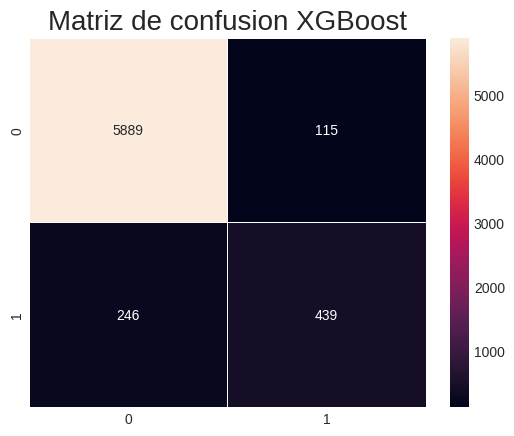

In [105]:
from sklearn.metrics import confusion_matrix

cmXGB = confusion_matrix(y_test, y_predXGB)

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5)
plt.title("Matriz de confusion XGBoost", fontsize=20)


Text(0.5, 1.0, 'Matriz de confusion RandomForest')

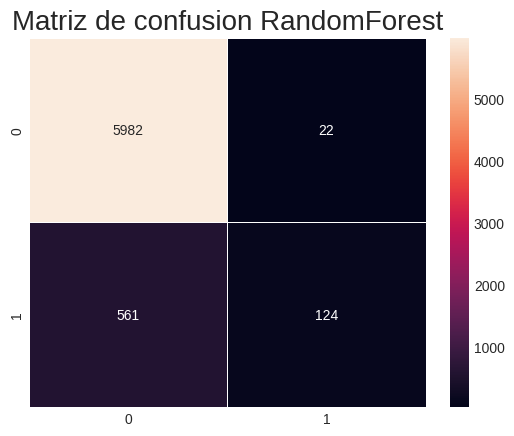

In [106]:
cmRF = confusion_matrix(y_test, y_predRF)

sns.heatmap(cmRF, annot=True, fmt="d", linewidths=.5)
plt.title("Matriz de confusion RandomForest", fontsize=20)


Text(0.5, 1.0, 'Matriz de confusion Regresion Logistica')

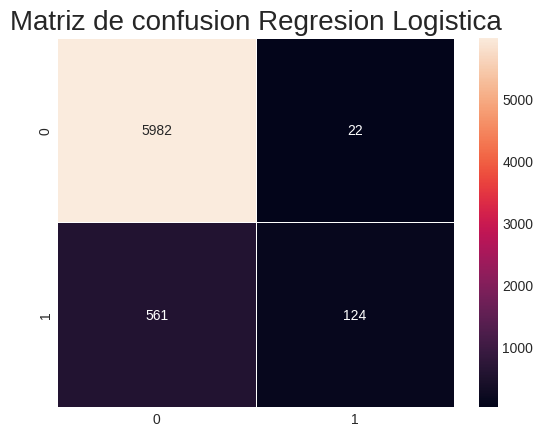

In [107]:
cmRL = confusion_matrix(y_test, y_predRF)

sns.heatmap(cmRL, annot=True, fmt="d", linewidths=.5)
plt.title("Matriz de confusion Regresion Logistica", fontsize=20)

####Curva ROC

* La curva ROC nos dice lo bien que nuestro clasificador está clasificando entre suscripciones de depósitos a plazo (Verdaderos Positivos) y suscripciones de depósitos sin.
El eje X está representado por las tasas de falsos positivos (especificidad) y el eje Y está representado por la tasa de verdaderos positivos (sensibilidad). Cuanto más cerca esté la línea de la esquina superior izquierda, mejor será el modelo de separación de ambas clases.
* El AUC es el area bajo la curva ROC y ayuda con la determinacion del rendimiento del modelo

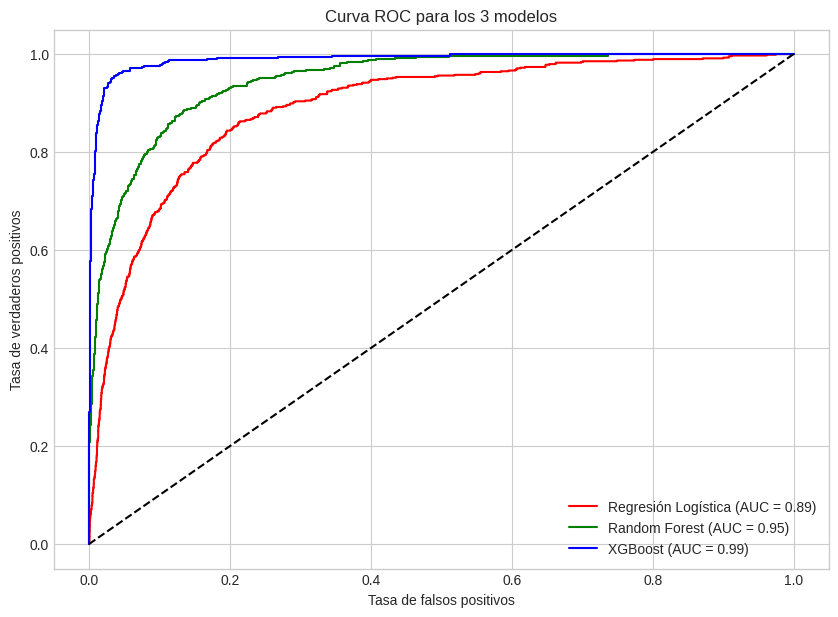

In [108]:
from sklearn.metrics import roc_curve, auc

# Calcular ROC y AUC para la Regresion Logistica
probsRL = ModeloRL.predict_proba(X_test)
probsRL = probsRL[:, 1]
fprRL, tprRL, thresholdsRL = roc_curve(y_test, probsRL)
roc_aucRL = auc(fprRL, tprRL)

# Calcular ROC y AUC para el RandomForest
probsRF = ModeloRF.predict_proba(X_test)
probsRF = probsRF[:, 1]
fprRF, tprRF, thresholdsRF = roc_curve(y_test, probsRF)
roc_aucRF = auc(fprRF, tprRF)

# Calcular ROC y AUC para el XGBoost
probsXGB = ModeloXGB.predict_proba(X_test)
probsXGB = probsXGB[:, 1]
fprXGB, tprXGB, thresholdsXGB = roc_curve(y_test, probsXGB)
roc_aucXGB = auc(fprXGB, tprXGB)

plt.figure(figsize=(10, 7))
plt.plot(fprRL, tprRL, color='red', label='Regresión Logística (AUC = %0.2f)' % roc_aucRL)
plt.plot(fprRF, tprRF, color='green', label='Random Forest (AUC = %0.2f)' % roc_aucRF)
plt.plot(fprXGB, tprXGB, color='blue', label='XGBoost (AUC = %0.2f)' % roc_aucXGB)

plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC para los 3 modelos')
plt.legend(loc='lower right')
plt.show()


###Conclusiones

XGBoost es el ganador entre los 3 modelos que se presentaron para para predecir, frente a un potencial cliente, la adhesion (o no) al deposito. Mostro un rendimiento del 94%


Ahora, que medidas puede comenzar a llevar el banco para potenciar la adhesion a los depositos?

*  Meses de actividad de marketing: Se observa que el mes de mayor actividad comercial fue mayo. Sin embargo, este fue el mes en el que los clientes potenciales tendieron a rechazar las ofertas de depósitos a plazo (Tasa efectiva más baja: -34,49%). Para la próxima campaña de marketing, sería prudente que el banco centrara la campaña de marketing durante los meses de marzo, septiembre, octubre y diciembre. (Diciembre debería tenerse en cuenta porque fue el mes con menor actividad de marketing, puede que haya una razón para que diciembre sea el más bajo).


* Edad:  La próxima campaña de marketing del banco debería dirigirse a clientes potenciales de 20 años o menos y de 60 años o más. La categoría más joven tenía un 60% de probabilidades de suscribir un depósito a plazo, mientras que la categoría de más edad tenía un 76% de probabilidades de suscribir un depósito a plazo.

* Ocupación: Como era de esperar con el analisis de edades, los clientes potenciales que eran estudiantes o jubilados eran los más propensos a suscribir un depósito a plazo